# Exploratory Data Analysis for Baseball Project

In this notebook I will set out to do in-depth data exploration of my data.
In previous notebooks and iterations of my project I performed little data
exploration in an effort to streamline modeling practice. However, it is now
necessary to deep dive into the data and understand the underlying trends
and shapes.

**Data Exploration Items:**
1. Variable Identification
  1. Type of Variable
    - Input Variables
    - Target Variables
  2. Data Types
    - Character
    - Numeric
  4. Variable Category
    - Continuous
    - Categorical
2. Univariate Analysis
3. Bi-variate Analysis
4. Missing values treatment
5. Outlier treatment
6. Variable transformation
7. Variable creation

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats as stats

In [2]:
data = pd.read_csv('FG_2010_2018_inning_6_load.csv')

## Variable Identification

In [3]:
data.head(2)

Season              Name     Team    G  Age   PA  HR    R  RBI  SB  ...  \
0    2017      Mookie Betts  Red Sox  153   24  712  24  101  102  26  ...   
1    2017  Christian Yelich  Marlins  156   25  695  18  100   81  16  ...   

   f_val_SB_rate  f_val_rate  ny_f_val_rate  HR_rate_std  R_rate_std  \
0           1.83        2.43       0.745460     0.077212    1.205684   
1           0.71        0.77       0.816703    -0.543295    1.037601   

   RBI_rate_std  SB_rate_std   AVG_std  f_val_std  ny_f_val_std  
0      1.226771     1.542399 -0.087713   3.964353     12.516023  
1      0.094554     0.596226  0.534600   1.719685     10.721773  

[2 rows x 55 columns]

In [4]:
data.describe()

Season            G          Age           PA           HR  \
count  1154.000000  1154.000000  1154.000000  1154.000000  1154.000000   
mean   2013.550260   141.068458    28.214038   579.262565    18.353553   
std       2.314325    16.168980     3.662962    86.555025     9.940838   
min    2010.000000    93.000000    19.000000   400.000000     0.000000   
25%    2012.000000   130.000000    26.000000   511.000000    11.000000   
50%    2014.000000   145.000000    28.000000   587.500000    17.000000   
75%    2016.000000   155.000000    31.000000   652.000000    25.000000   
max    2017.000000   162.000000    40.000000   754.000000    59.000000   

                 R          RBI           SB          BB%           K%  ...  \
count  1154.000000  1154.000000  1154.000000  1154.000000  1154.000000  ...   
mean     72.337955    69.570191    10.006932     0.085828     0.183038  ...   
std      18.773729    22.253659    11.004136     0.030436     0.056472  ...   
min      26.000000    17.000000     0.000000     0.021000     0.058000  ...   
25%      58.000000    52.000000     2.000000     0.063000     0.142000  ...   
50%      71.500000    68.000000     6.000000     0.083000     0.179000  ...   
75%      85.000000    85.000000    14.000000     0.105000     0.219000  ...   
max     137.000000   139.000000    68.000000     0.206000     0.372000  ...   

       f_val_SB_rate   f_val_rate  ny_f_val_rate  HR_rate_std   R_rate_std  \
count    1154.000000  1154.000000    1154.000000  1154.000000  1154.000000   
mean        0.049159     0.195347       0.029685     0.106438     0.175737   
std         1.147934     1.342655       0.521885     1.015281     0.980659   
min        -1.000000    -2.620000      -1.000000    -2.080068    -2.711601   
25%        -0.770000    -0.727500      -0.366880    -0.695430    -0.534081   
50%        -0.340000    -0.015000      -0.005117     0.062385     0.141844   
75%         0.527500     0.957500       0.366121     0.822500     0.817740   
max         7.140000     6.980000       1.888168     3.665980     3.934791   

       RBI_rate_std  SB_rate_std      AVG_std    f_val_std  ny_f_val_std  
count   1154.000000  1154.000000  1154.000000  1154.000000   1154.000000  
mean       0.127342     0.044009     0.127762     0.581287      0.260231  
std        1.006717     1.014020     0.971037     3.076915      3.240759  
min       -2.717538    -0.969940    -3.869888    -7.862697     -7.862697  
25%       -0.627220    -0.666457    -0.535968    -1.690974     -2.160351  
50%        0.120951    -0.299616     0.133874     0.417967      0.045613  
75%        0.809049     0.457565     0.772735     2.528986      2.423202  
max        3.489644     6.189380     3.507457    11.463261     12.516023  

[8 rows x 53 columns]

In [5]:
# drop these columns since they won't be used (some shouldn't be used) in predicting the target
drop_cols = ['Season', 'Name', 'Team', 'f_val_HR', 'f_val_R','f_val_RBI','f_val_SB','f_val_BA', 
             'f_val', 'ny_f_val', 'HR', 'R', 'RBI', 'SB', 'f_val_HR_rate', 'f_val_R_rate', 
             'f_val_RBI_rate', 'f_val_SB_rate', 'f_val_rate', 'ny_f_val_rate', 'HR_rate_std', 
             'R_rate_std', 'RBI_rate_std','SB_rate_std', 'AVG_std', 'f_val_std']

#for use in data visualization
data2 = data.drop(drop_cols, axis=1)

In [6]:
# split the data to avoid data leakage in exploration
# train on pre-2016 data (cut off at 300)
df_train = data2[300:].copy()
df_test = data2[:300].copy()

# drop playerid column since it isn't a predictor variable
train_ID = df_train['playerid']
test_ID = df_test['playerid']

df_train.drop("playerid", axis=1, inplace = True)
df_test.drop("playerid", axis=1, inplace = True)

## Univariate and Bivariate Analysis

First I want to explore the correlation between variables and the target then I want to explore the correlation between variables themselves (detect multicollinearity).

<AxesSubplot:>

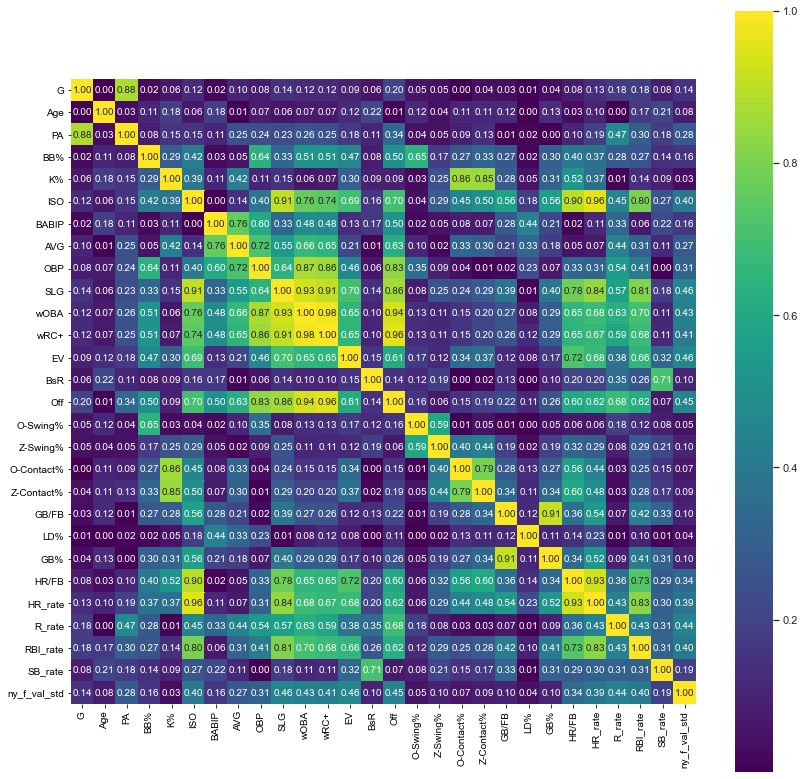

In [17]:
# explore further with correlation matrix
corrmat = abs(df_train.corr())
f, ax  = plt.subplots(figsize=(14,14))
sns.set(font_scale=1.0)
sns.heatmap(corrmat, vmax=1, cmap='viridis', annot=True, fmt='.2f', square=True, annot_kws={'size': 10})

In [7]:
# identify variables with low target correlation (tcor). low < 0.2

low_cor = ['G', 'Age', 'BB%', 'K%', 'BABIP', 'BsR', 'O-Swing%', 
           'Z-Swing%', 'O-Contact%', 'Z-Contact%', 'GB/FB', 
           'LD%', 'GB%', 'SB_rate']

# drop low tcor variables from analysis
df_train_high_corr = df_train.drop(low_cor, axis=1)
df_test_high_corr = df_test.drop(low_cor, axis=1)

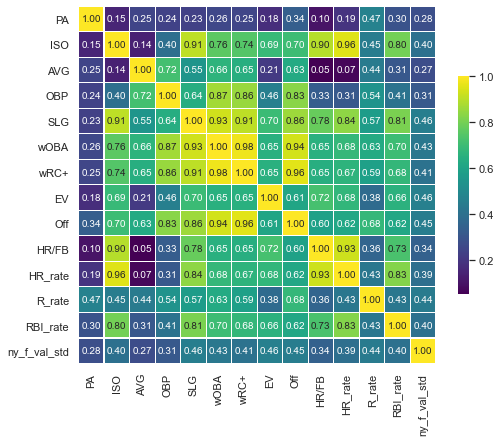

In [18]:
# correlation matrix on new data to find multicollinearity
corrmat = abs(df_train_high_corr.corr())
f, ax  = plt.subplots(figsize=(8,8))
sns.set(font_scale=1.0)
sns.heatmap(corrmat, vmax=1, cmap='viridis', annot=True, linewidths=0.2, fmt='.2f', square=True, cbar_kws={"shrink": .5}, annot_kws={'size': 10})
# plt.savefig('corr_matrix.png', dpi=150) 

In [13]:
# identify multicolinearity and which to drop
  # SLG and ISO with SLG >tcor --> DROP ISO
  # OBP and wOBA with wOBA >tcor --> DROP OBP
  # SLG and wOBA with SLG >tcor --> DROP wOBA
  # SLG and wRC+ with SLG >tcor --> DROP wRC+
  # SLG and Off with Off >tcor --> DROP SLG 
  # HR/FB and HR_rate with HR_rate >tcor --> DROP HR/FB
  # RBI_rate > HR_rate but RBI_rate in target calc so keeping 

colin_cols = ['ISO', 'OBP', 'wOBA', 'wRC+', 'SLG', 'HR/FB']

df_train = df_train_high_corr.drop(colin_cols, axis=1)
df_test = df_test_high_corr.drop(colin_cols, axis=1)

Next, I want to look at the pair plot of the variables left over. This will help visualize the relationship between variables as well as view the distribution of each variable.

<Figure size 432x432 with 0 Axes>

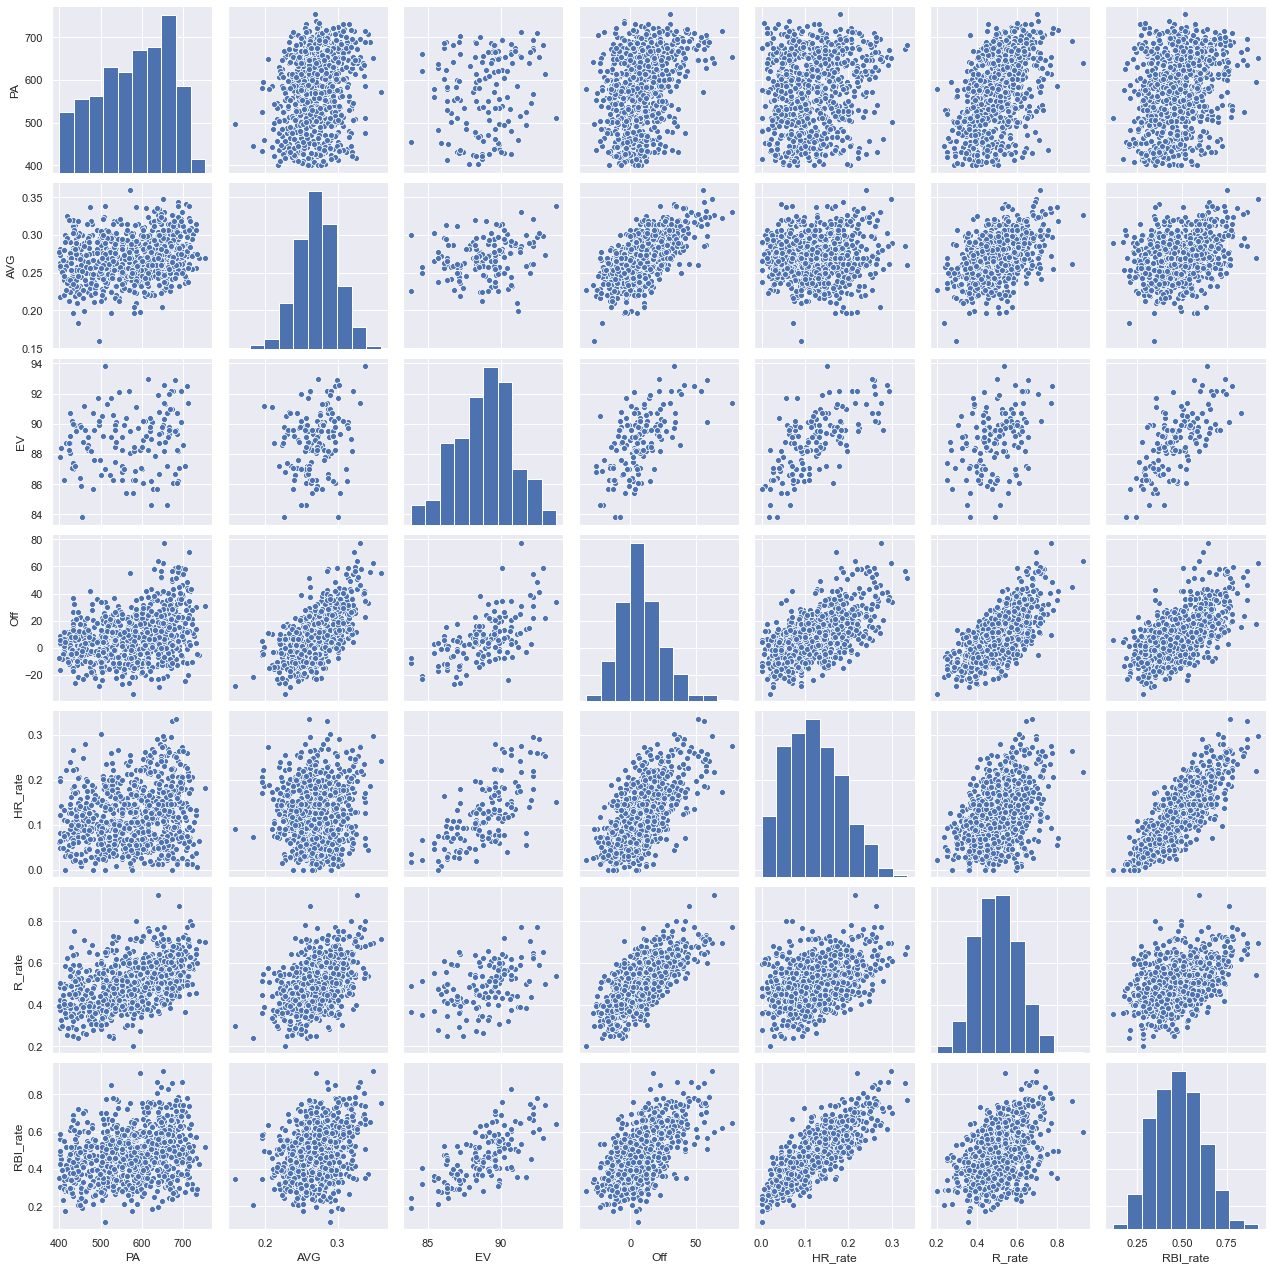

In [15]:
# pair plot will show bot univariate and multivariate analysis
plt.figure(figsize=(6,6))
sns.pairplot(data=df_train.drop('ny_f_val_std', axis=1))
plt.savefig('pair_plot.png') 

Lastly, I want to investigate the distribution of the target variable to ensure that a transformation doesn't need to take place.

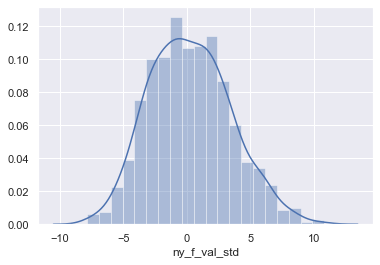

In [37]:
# target variable shape
target_distro = sns.distplot(df_train['ny_f_val_std'])
target_distro = target_distro.get_figure()
target_distro.savefig('target_distribution.png')

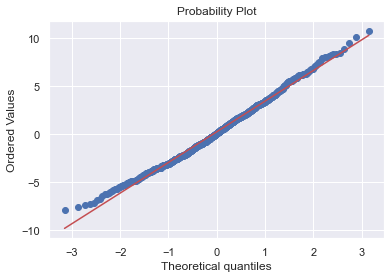

In [44]:
prob_plot = stats.probplot(x=df_train['ny_f_val_std'], plot=plt)
plt.savefig('prob_plot.png') 

The target appears to be close to normally distributed so no transformation is needed.

## Missing Value Treatment

In this section I will look for missing values in the data. I would expect all data to be present unless it recently started being recorded by statisticians.

In [26]:
# define a function to output number of missing values for each column of the data frame
def display_missing(df):
    for col in df.columns.tolist():
        print('{} column missing values: {}'.format(col, df[col].isnull().sum()))
    print('\n')

In [27]:
display_missing(df_train)

PA column missing values: 0
AVG column missing values: 0
EV column missing values: 705
Off column missing values: 0
HR_rate column missing values: 0
R_rate column missing values: 0
RBI_rate column missing values: 0
ny_f_val_std column missing values: 0




In [28]:
len(df_train)

854

EV is Exit Velocity and only started being recorded as a stat in the MLB in 2015. Therefore, we most of our training data will be missing this value. We will drop the feature because of this.

In [29]:
# EV missing 705/854 = 83% of training records.. dropping feature
df_train = df_train.drop('EV', axis=1)
df_test = df_test.drop('EV', axis=1)

In [30]:
df_train.columns

Index(['PA', 'AVG', 'Off', 'HR_rate', 'R_rate', 'RBI_rate', 'ny_f_val_std'], dtype='object')

## Outlier Treatment

For this exercise I wanted to include outliers since we would definitely want to try and find those players in our model. It will essentailly provide a small sample size of "superstar" players. Below I create some scatter plots just to see if any outliers exist.

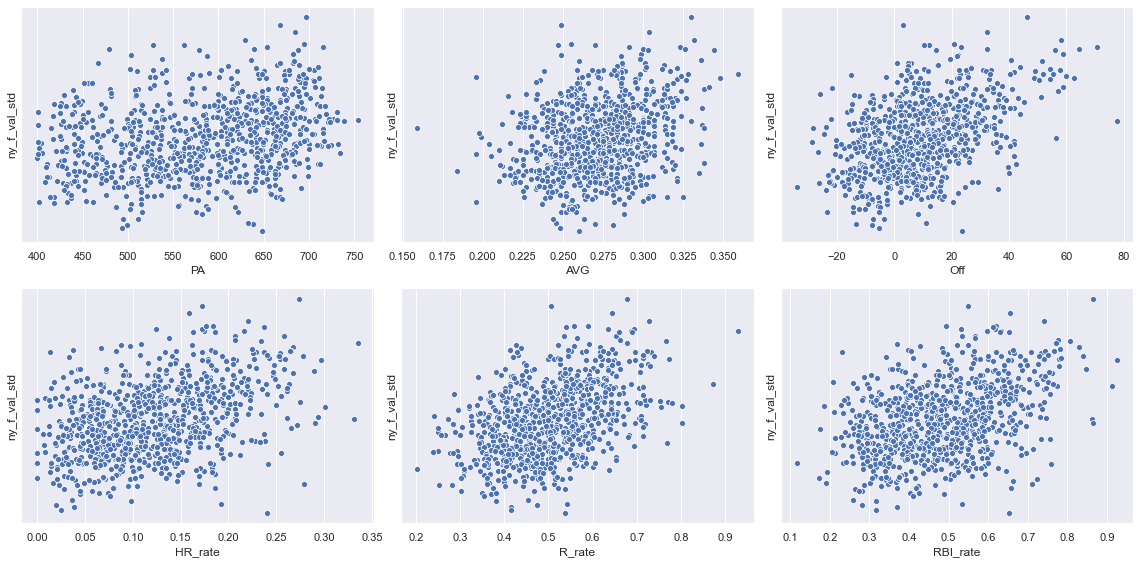

In [31]:
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

sns.scatterplot(x='PA', y='ny_f_val_std', data=df_train, ax=axes[0,0])
sns.scatterplot(x='AVG', y='ny_f_val_std', data=df_train, ax=axes[0,1])
sns.scatterplot(x='Off', y='ny_f_val_std', data=df_train, ax=axes[0,2])
sns.scatterplot(x='HR_rate', y='ny_f_val_std', data=df_train, ax=axes[1,0])
sns.scatterplot(x='R_rate', y='ny_f_val_std', data=df_train, ax=axes[1,1])
sns.scatterplot(x='RBI_rate', y='ny_f_val_std', data=df_train, ax=axes[1,2])

plt.setp(axes, yticks=[])
plt.tight_layout()

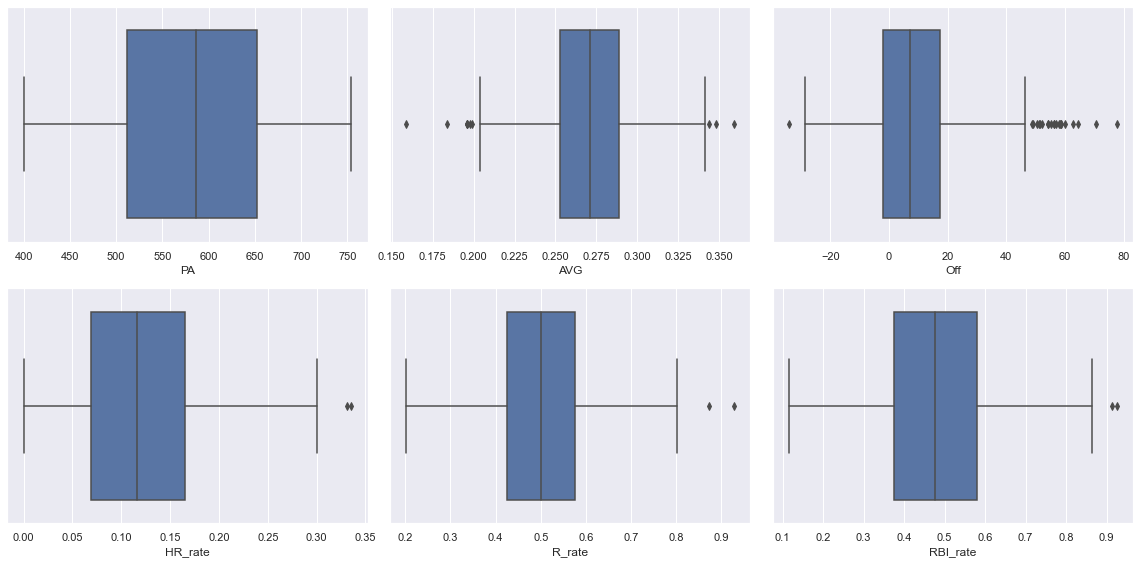

In [33]:
figure, axes = plt.subplots(nrows=2, ncols=3, figsize=(16,8))

sns.boxplot(x='PA', data=df_train, ax=axes[0,0])
sns.boxplot(x='AVG', data=df_train, ax=axes[0,1])
sns.boxplot(x='Off', data=df_train, ax=axes[0,2])
sns.boxplot(x='HR_rate', data=df_train, ax=axes[1,0])
sns.boxplot(x='R_rate', data=df_train, ax=axes[1,1])
sns.boxplot(x='RBI_rate', data=df_train, ax=axes[1,2])

plt.setp(axes, yticks=[])
plt.tight_layout()

There appears to be a few identifiable outliers when looking at the scatter plots and box plots, but per the reasoning above, we will keep them in the data.